In [6]:
#Author: Kin Seet
#Data mining project
#Reference materials from:
# https://mubaris.com/posts/kmeans-clustering/
# https://github.com/mubaris/friendly-fortnight

In [7]:
%matplotlib inline
import numpy as np
import math
import argparse
import pandas as pd
import pickle
import csv
import random
from pathlib import Path
from matplotlib import pyplot as plt
from decimal import Decimal
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import metrics
from copy import deepcopy
from collections import Counter
from random import randint
from mpl_toolkits.mplot3d import Axes3D

In [8]:
#Distance formula
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)
    #return (math.sqrt((float(y[1])-x[1])**2 + (x[0]-float(y[0]))**2))

In [9]:
def process_latitude_longtitude(location):
    #latitude_longitude column
    latitude_longitude = [] 
    with open('lat_long_all.csv', 'w', newline='') as csvfile:
        fieldnames = ['c0', 'c1']
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        for i in range(0, len(location)):
#             k = location[i].strip('()').split(',')
#             k[1] = k[1].strip()
            #if (k[0] != '0' and k[1] != '0'):
            latitude_longitude.append(location[i])
            writer.writerow({'c0': location[i][0], 'c1': location[i][1]})

    return latitude_longitude

Text(0.5,1,'TRAFFIC')

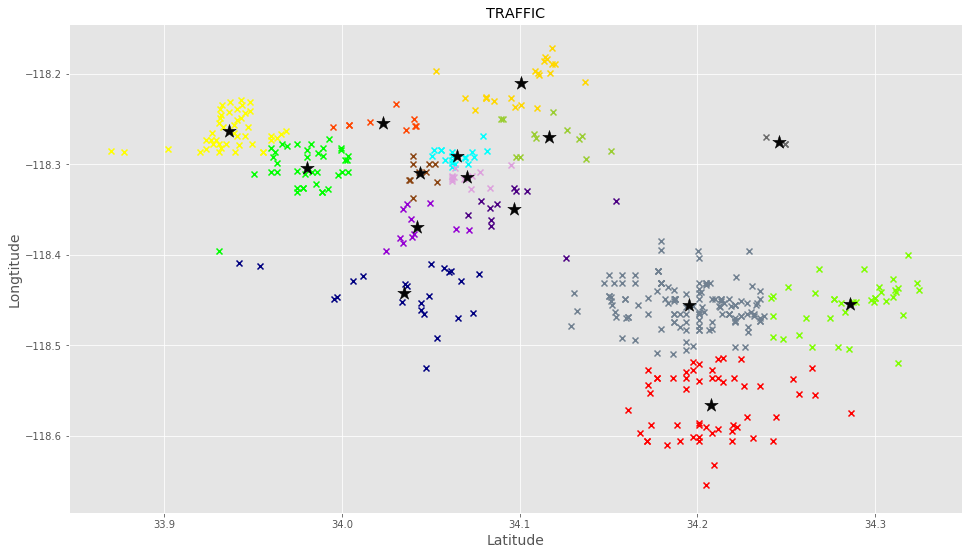

In [10]:
#set figure size for plot
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

#extract stuff from warehouse
read = pd.read_csv('t_data.csv', delimiter = ',')

location = read['Location']

crime_code = read['Crime Type Code']
area_id = read['Area ID']
crime1 = []
crime2 = []
crime3 = []
crime4 = []
crime5 = []
crime6 = []
latitude_longitude1 = []
latitude_longitude2 = []
latitude_longitude3 = []
latitude_longitude4 = []
latitude_longitude5 = []
latitude_longitude6 = []

latitude_longitude7 = []
latitude_longitude8 = []
latitude_longitude9 = []
latitude_longitude10 = []
latitude_longitude11 = []
latitude_longitude12 = []

latitude_longitude13 = []
latitude_longitude14 = []
latitude_longitude15 = []
latitude_longitude16 = []
latitude_longitude17 = []
latitude_longitude18 = []

latitude_longitude19 = []
latitude_longitude20 = []
latitude_longitude21 = []

latitude_longitude_all = []
colors = ['red','yellow','navy','gold','lime',
          'darkviolet','chartreuse','orangered','slategray','dimgrey',
          'saddlebrown','aqua', 'yellowgreen','indigo','plum',
          'beige','brown','red','olive','navy',
          'deeppink','darkkhaki', 'dimgrey', 'blueviolent','palegoldenrod',
         'darkmagenta','y','crimson','thistle','goldenrod']
######################################## The following block is to plot clusters for each type of crime #############################################################
for i in range(0, len(crime_code)):
    try:
        k = location[i].strip('()').split(',')
        k[1] = k[1].strip()
        k[0] = float(k[0])
        k[1] = float(k[1])
    except:
        print(location[i])
    #(34.706 -118.0879), (34.0996 -117.7059), 34.1025 -117.7246
    #Exclude some useless coords
    if crime_code[i] == 1 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            crime1.append(i)
            latitude_longitude1.append(k)
            latitude_longitude_all.append(k)
        
    elif crime_code[i] == 2 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            crime2.append(i)
            latitude_longitude2.append(k)
            latitude_longitude_all.append(k)
        
    elif crime_code[i] == 3 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            crime3.append(i)
            latitude_longitude3.append(k)
            latitude_longitude_all.append(k)
        
    elif crime_code[i] == 4 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            crime4.append(i)
            latitude_longitude4.append(k)
            latitude_longitude_all.append(k)
        
    elif crime_code[i] == 5 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            crime5.append(i)
            latitude_longitude5.append(k)
            latitude_longitude_all.append(k)
        
    elif crime_code[i] == 6 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879):
        if float(k[1]) < -117.8:
            crime6.append(i)
            latitude_longitude6.append(k)
            latitude_longitude_all.append(k)

#process_latitude_longtitude(latitude_longitude1)
read_lat_long = pd.read_csv('./latitude_longtitude_of_each_crime/lat_long1.csv', delimiter = ',')
latit = read_lat_long['c0'].values
longti = read_lat_long['c1'].values

X = np.array(list(zip(latit, longti)))


# #number of clusters(hotspots)
k = 15
temp_x = []
temp_y = []

for i in range(0, k):
    #X coordinates of random centroids, latitude[]
    temp_x.append(latit[random.randint(len(latit)-1,len(latit)-1)])
    # Y coordinates of random centroids
    temp_y.append(longti[random.randint(len(longti)-1,len(longti)-1)])

C_x = np.array(temp_x)
C_y = np.array(temp_y)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)


# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)


# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        if len(points) != 0:
            C[i] = np.mean(points, axis=0)

    error = dist(C, C_old, None)

    
fig, ax = plt.subplots()
for i in range(0, k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    if len(points) != 0:
        ax.scatter([p[0] for p in points], [p[1] for p in points], c=colors[i], marker='x')
ax.scatter([c[0] for c in C], [c[1] for c in C], marker='*', s=200, c='#050505')
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longtitude', fontsize=14)
title = 'TRAFFIC'
plt.title(title)
#plt.savefig(title + '.png')

############################################################# The following is to plot all 21 areas clustering #############################################################
for i in range(0, len(area_id)):
    try:
        k = location[i].strip('()').split(',')
        k[1] = k[1].strip()
        k[0] = float(k[0])
        k[1] = float(k[1])
    except:
        print(location[i])
        
    #Exclude some useless coords
    if area_id[i] == 1 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879):
        if float(k[1]) < -117.8:
            latitude_longitude1.append(k)
            
    elif area_id[i] == 2 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude2.append(k)
            
    elif area_id[i] == 3 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude3.append(k)
            
    elif area_id[i] == 4 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude4.append(k)
            
    elif area_id[i] == 5 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude5.append(k)
            
    elif area_id[i] == 6 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude6.append(k)
    elif area_id[i] == 7 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude7.append(k)
    elif area_id[i] == 8 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude8.append(k)
    elif area_id[i] == 9 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude9.append(k)
    elif area_id[i] == 10 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude10.append(k)
    elif area_id[i] == 11 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude11.append(k)
    elif area_id[i] == 12 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude12.append(k)
    elif area_id[i] == 13 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude13.append(k)
    elif area_id[i] == 14 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude14.append(k)
    elif area_id[i] == 15 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude15.append(k)
    elif area_id[i] == 16 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude16.append(k)
    elif area_id[i] == 17 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude17.append(k)
    elif area_id[i] == 18 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude18.append(k)
    elif area_id[i] == 19 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude19.append(k)
    elif area_id[i] == 20 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude20.append(k)
    elif area_id[i] == 21 and (k[0] != '0' and k[1] != '0') and (float(k[0]) != 34.706 and float(k[1]) != -118.0879) :
        if float(k[1]) < -117.8:
            latitude_longitude21.append(k)
        
fig, ax = plt.subplots()
ax.scatter([loc[0] for loc in latitude_longitude1], [loc[1] for loc in latitude_longitude1], c=colors[0], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude2], [loc[1] for loc in latitude_longitude2], c=colors[1], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude3], [loc[1] for loc in latitude_longitude3], c=colors[2], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude4], [loc[1] for loc in latitude_longitude4], c=colors[3], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude5], [loc[1] for loc in latitude_longitude5], c=colors[4], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude6], [loc[1] for loc in latitude_longitude6], c=colors[5], marker='x')

ax.scatter([loc[0] for loc in latitude_longitude7], [loc[1] for loc in latitude_longitude7], c=colors[6], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude8], [loc[1] for loc in latitude_longitude8], c=colors[7], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude9], [loc[1] for loc in latitude_longitude9], c=colors[8], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude10], [loc[1] for loc in latitude_longitude10], c=colors[9], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude11], [loc[1] for loc in latitude_longitude11], c=colors[10], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude12], [loc[1] for loc in latitude_longitude12], c=colors[11], marker='x')

ax.scatter([loc[0] for loc in latitude_longitude13], [loc[1] for loc in latitude_longitude13], c=colors[12], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude14], [loc[1] for loc in latitude_longitude14], c=colors[13], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude15], [loc[1] for loc in latitude_longitude15], c=colors[14], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude16], [loc[1] for loc in latitude_longitude16], c=colors[15], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude17], [loc[1] for loc in latitude_longitude17], c=colors[16], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude18], [loc[1] for loc in latitude_longitude18], c=colors[17], marker='x')

ax.scatter([loc[0] for loc in latitude_longitude19], [loc[1] for loc in latitude_longitude19], c=colors[18], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude20], [loc[1] for loc in latitude_longitude20], c=colors[19], marker='x')
ax.scatter([loc[0] for loc in latitude_longitude21], [loc[1] for loc in latitude_longitude21], c=colors[20], marker='x')

plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longtitude', fontsize=14)
title = 'All 21 AREAS'
plt.title(title)
#plt.savefig(title + '.png')
####################################################################################################################################################################################

#1.TRAFFIC
#2.NONVIOLENT
#3.THEFT
#4.SEXUAL
#5.CHILD
#6.VIOLENT
#All 21 AREAS